In [1]:
%%capture
!pip install pandas

In [2]:
import pandas as pd

## Reading Data

In [3]:
data_df = pd.read_csv("./data/input/train.csv")
data_df.head(10)

,uuid,title,author,abstract,Keywords,label
0,0,Accessible Visual Artworks for Blind and Visua...,"Quero, Luis Cavazos; Bartolome, Jorge Iranzo; ...",Despite the use of tactile graphics and audio ...,accessibility technology; multimodal interacti...,0
1,1,Seizure Detection and Prediction by Parallel M...,"Li, Chenqi; Lammie, Corey; Dong, Xuening; Amir...","During the past two decades, epileptic seizure...",CNN; Seizure Detection; Seizure Prediction; EE...,1
2,2,Fast ScanNet: Fast and Dense Analysis of Multi...,"Lin, Huangjing; Chen, Hao; Graham, Simon; Dou,...",Lymph node metastasis is one of the most impor...,Histopathology image analysis; computational p...,1
3,3,Long-Term Effectiveness of Antiretroviral Ther...,"Huang, Peng; Tan, Jingguang; Ma, Wenzhe; Zheng...",In order to assess the effectiveness of the Ch...,HIV; ART; mortality; observational cohort stud...,0
4,4,Real-Time Facial Affective Computing on Mobile...,"Guo, Yuanyuan; Xia, Yifan; Wang, Jing; Yu, Hui...",Convolutional Neural Networks (CNNs) have beco...,facial affective computing; convolutional neur...,0
5,5,A phenotype-based forward genetic screen ident...,"Yonghe Ding,Di Lang,Jianhua Yan,Haisong Bu,Hon...",Previously we showed the generation of a prote...,Dnajb6; electrocardiogram; genetic diseases; g...,1
6,6,ROS System Facial Emotion Detection Using Mach...,"Martinez, Javier; Vega, Julio",Facial emotion recognition (FER) is a field of...,ROS; low-cost; raspberry Pi; visual attention;...,0
7,7,A Novel Machine Learning Approach for Android ...,"Odat, Esraa; Yaseen, Qussai M.",This paper proposes a machine learning model b...,Malware; Feature extraction; Machine learning ...,0
8,8,Universal blind image quality assessment using...,"Sang, Qingbing; Wu, Xiaojun; Li, Chaofeng; Lu,...",Most current state-of-the-art blind image qual...,completely blind; image quality assessment; si...,0
9,9,EndoNet: A Deep Architecture for Recognition T...,"Twinanda, Andru P.; Shehata, Sherif; Mutter, D...",Surgical workflow recognition has numerous pot...,Laparoscopic videos; cholecystectomy; convolut...,1


In [4]:
data_df.shape

(6000, 6)

## Each data record is a document
## Let's say we are interested in only the abstract part of research paper

### Thus, the document content for us is the research paper abstract

In [5]:
data_df.drop(columns=['uuid', 'title', 'author', 'Keywords'], inplace=True, axis=1)
data_df.head(10)

,abstract,label
0,Despite the use of tactile graphics and audio ...,0
1,"During the past two decades, epileptic seizure...",1
2,Lymph node metastasis is one of the most impor...,1
3,In order to assess the effectiveness of the Ch...,0
4,Convolutional Neural Networks (CNNs) have beco...,0
5,Previously we showed the generation of a prote...,1
6,Facial emotion recognition (FER) is a field of...,0
7,This paper proposes a machine learning model b...,0
8,Most current state-of-the-art blind image qual...,0
9,Surgical workflow recognition has numerous pot...,1


In [6]:
print(data_df.iloc[0]['abstract'], '\n')
print(data_df.iloc[9]['abstract'])

Despite the use of tactile graphics and audio guides, blind and visually impaired people still face challenges to experience and understand visual artworks independently at art exhibitions. Art museums and other art places are increasingly exploring the use of interactive guides to make their collections more accessible. In this work, we describe our approach to an interactive multimodal guide prototype that uses audio and tactile modalities to improve the autonomous access to information and experience of visual artworks. The prototype is composed of a touch-sensitive 2.5D artwork relief model that can be freely explored by touch. Users can access localized verbal descriptions and audio by performing touch gestures on the surface while listening to themed background music along. We present the design requirements derived from a formative study realized with the help of eight blind and visually impaired participants, art museum and gallery staff, and artists. We extended the formative 

### From TEXT to TOKEN

In [7]:
text = data_df.iloc[9]['abstract']
text

'Surgical workflow recognition has numerous potential medical applications, such as the automatic indexing of surgical video databases and the optimization of real-time operating room scheduling, among others. As a result, surgical phase recognition has been studied in the context of several kinds of surgeries, such as cataract, neurological, and laparoscopic surgeries. In the literature, two types of features are typically used to perform this task: visual features and tool usage signals. However, the used visual features are mostly handcrafted. Furthermore, the tool usage signals are usually collected via a manual annotation process or by using additional equipment. In this paper, we propose a novel method for phase recognition that uses a convolutional neural network (CNN) to automatically learn features from cholecystectomy videos and that relies uniquely on visual information. In previous studies, it has been shown that the tool usage signals can provide valuable information in pe

In [8]:
import nltk

In [9]:
text_tokenized = nltk.tokenize.word_tokenize(text)
text_tokenized

['Surgical',
 'workflow',
 'recognition',
 'has',
 'numerous',
 'potential',
 'medical',
 'applications',
 ',',
 'such',
 'as',
 'the',
 'automatic',
 'indexing',
 'of',
 'surgical',
 'video',
 'databases',
 'and',
 'the',
 'optimization',
 'of',
 'real-time',
 'operating',
 'room',
 'scheduling',
 ',',
 'among',
 'others',
 '.',
 'As',
 'a',
 'result',
 ',',
 'surgical',
 'phase',
 'recognition',
 'has',
 'been',
 'studied',
 'in',
 'the',
 'context',
 'of',
 'several',
 'kinds',
 'of',
 'surgeries',
 ',',
 'such',
 'as',
 'cataract',
 ',',
 'neurological',
 ',',
 'and',
 'laparoscopic',
 'surgeries',
 '.',
 'In',
 'the',
 'literature',
 ',',
 'two',
 'types',
 'of',
 'features',
 'are',
 'typically',
 'used',
 'to',
 'perform',
 'this',
 'task',
 ':',
 'visual',
 'features',
 'and',
 'tool',
 'usage',
 'signals',
 '.',
 'However',
 ',',
 'the',
 'used',
 'visual',
 'features',
 'are',
 'mostly',
 'handcrafted',
 '.',
 'Furthermore',
 ',',
 'the',
 'tool',
 'usage',
 'signals',
 'are'

In [10]:
'Surgical' == 'surgical'

False

In [11]:
'In' == 'in'

False

### As evident, the text is currently in its 'raw' form
### There is lack of standardization

# Lets move ahead for now
# We'll re-visit this above point soon

## Perform NLTK tokenize on entire data

In [12]:
def tokenize_dataframe(row):
    row['tokenized'] = nltk.tokenize.word_tokenize(row['abstract'])
    return row

data_df['tokenized'] = [list() for _ in range(data_df.shape[0])]
data_df = data_df.apply(tokenize_dataframe, axis=1)

In [13]:
data_df.head(10)

,abstract,label,tokenized
0,Despite the use of tactile graphics and audio ...,0,"[Despite, the, use, of, tactile, graphics, and..."
1,"During the past two decades, epileptic seizure...",1,"[During, the, past, two, decades, ,, epileptic..."
2,Lymph node metastasis is one of the most impor...,1,"[Lymph, node, metastasis, is, one, of, the, mo..."
3,In order to assess the effectiveness of the Ch...,0,"[In, order, to, assess, the, effectiveness, of..."
4,Convolutional Neural Networks (CNNs) have beco...,0,"[Convolutional, Neural, Networks, (, CNNs, ), ..."
5,Previously we showed the generation of a prote...,1,"[Previously, we, showed, the, generation, of, ..."
6,Facial emotion recognition (FER) is a field of...,0,"[Facial, emotion, recognition, (, FER, ), is, ..."
7,This paper proposes a machine learning model b...,0,"[This, paper, proposes, a, machine, learning, ..."
8,Most current state-of-the-art blind image qual...,0,"[Most, current, state-of-the-art, blind, image..."
9,Surgical workflow recognition has numerous pot...,1,"[Surgical, workflow, recognition, has, numerou..."


## Let's vizualise data

In [14]:
import matplotlib.pyplot as plt

In [15]:
NUM_MOST_COMMON_WORDS = 50

In [16]:
from collections import Counter
from matplotlib import pyplot as plt

def visualize_feat_barplot(text_tokens):
    text_tokens_count = dict(Counter(text_tokens))
    text_tokens_count = dict(sorted(text_tokens_count.items(), key=lambda item: item[1], reverse=True))
    
    plt.rcParams["figure.figsize"] = [10, 5]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams["font.size"] = 10
    
    # Create a DataFrame
    df = pd.DataFrame.from_dict(text_tokens_count, orient='index')
    df = df[:NUM_MOST_COMMON_WORDS]
    
    # Plot a bar chart
    df.plot(kind='bar')
    plt.xlabel('Items')
    plt.ylabel('Frequency')
    plt.title('Frequency of Items')
    plt.show()
    del df
    return None

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def visualize_wordcloud(text_tokens):
    text = ' '.join([t for t in text_tokens])
    wordcloud = WordCloud(background_color="white").generate(text)
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

#### Visualizing tokens of entire corpus (irrespective of labels)

In [18]:
text_tokens =[token for tokenized_record in data_df['tokenized'].tolist() for token in tokenized_record]

print(len(text_tokens))
print(text_tokens[0], text_tokens[1], text_tokens[-1])

1266529
Despite the .


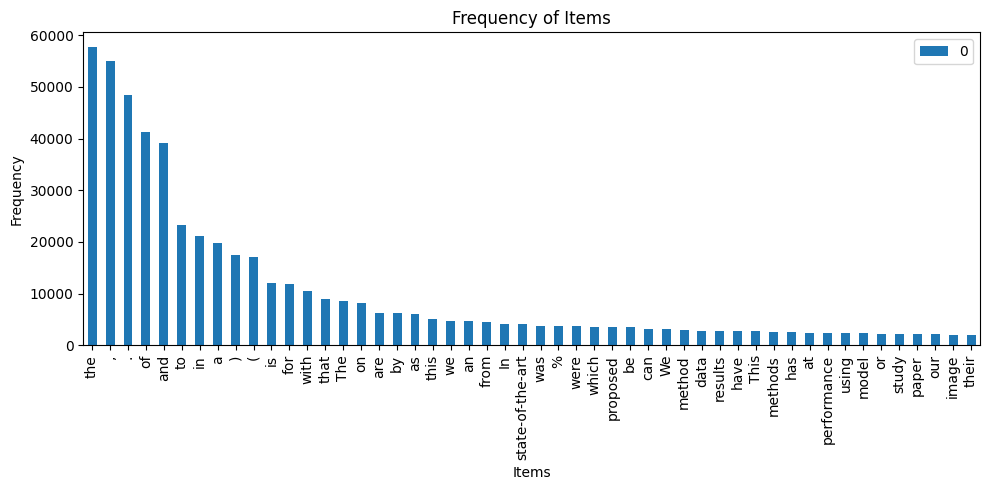

In [19]:
visualize_feat_barplot(text_tokens)

#### Visualizing tokens of entire corpus (Class 0)

In [20]:
data_df_slice = data_df[data_df['label'] == 0]
text_tokens =[token for tokenized_record in data_df_slice['tokenized'].tolist() for token in tokenized_record]

print(len(text_tokens))
print(text_tokens[0], text_tokens[1], text_tokens[-1])
del data_df_slice

595987
Despite the .


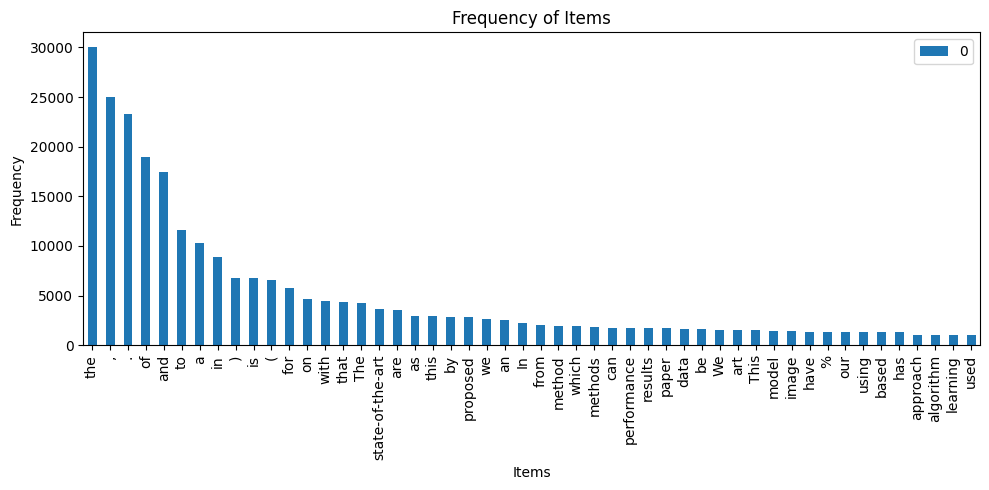

In [21]:
visualize_feat_barplot(text_tokens)

#### Visualizing tokens of entire corpus (Class 1)

In [22]:
data_df_slice = data_df[data_df['label'] == 1]
text_tokens =[token for tokenized_record in data_df_slice['tokenized'].tolist() for token in tokenized_record]

print(len(text_tokens))
print(text_tokens[0], text_tokens[1], text_tokens[-1])
del data_df_slice

670542
During the .


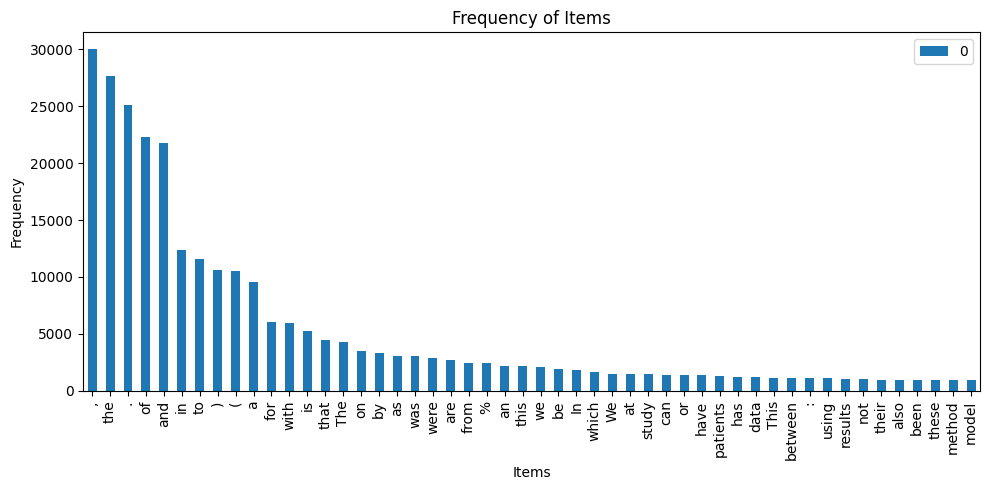

In [23]:
visualize_feat_barplot(text_tokens)

### Feature distribution does not showcase so good features
### Lots of irrelevant features

## Text Cleaning

In [24]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [25]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

#### Some demonstrations of lemmatization

In [26]:
def sample_tokenize(sample_text):
    print("Processing Text:", sample_text)
    sample_text_tokens = sample_text.split()
    for token in sample_text_tokens:
        token_lemmatized = lemmatizer.lemmatize(token)
        print("token_lemmatized (Without POS) :", token_lemmatized)
        token_lemmatized = lemmatizer.lemmatize(token, get_wordnet_pos(token))
        print("token_lemmatized (With POS)    :", token_lemmatized)

sample_text = "goes"
sample_tokenize(sample_text)
print("\n")

sample_text = "running"
sample_tokenize(sample_text)
print("\n")

print("===== Sentence Begin! =====")
sample_text = "He is running"
sample_tokenize(sample_text)
print("===== Sentence Done!! =====", "\n")

print("===== Sentence Begin! =====")
sample_text = "It's a running race"
sample_tokenize(sample_text)
print("===== Sentence Done!! =====", "\n")

Processing Text: goes
token_lemmatized (Without POS) : go
token_lemmatized (With POS)    : go


Processing Text: running
token_lemmatized (Without POS) : running
token_lemmatized (With POS)    : run


===== Sentence Begin! =====
Processing Text: He is running
token_lemmatized (Without POS) : He
token_lemmatized (With POS)    : He
token_lemmatized (Without POS) : is
token_lemmatized (With POS)    : be
token_lemmatized (Without POS) : running
token_lemmatized (With POS)    : run
===== Sentence Done!! ===== 

===== Sentence Begin! =====
Processing Text: It's a running race
token_lemmatized (Without POS) : It's
token_lemmatized (With POS)    : It's
token_lemmatized (Without POS) : a
token_lemmatized (With POS)    : a
token_lemmatized (Without POS) : running
token_lemmatized (With POS)    : run
token_lemmatized (Without POS) : race
token_lemmatized (With POS)    : race
===== Sentence Done!! ===== 



In [27]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [28]:
import re

do_remove_punct = True
do_lemmatize = True
do_lowercase = True
do_remove_stop = True

def custom_tokenize(row):
    text = row['abstract']
    
    # 01 - Punctuations
    if do_remove_punct:
        text = re.sub(r'([^\w\s])', '', text)

    # 02 - Lemmatization
    if do_lemmatize:
        tokens_list = nltk.word_tokenize(text)
        text = ' '.join([lemmatizer.lemmatize(t, get_wordnet_pos(t)) for t in tokens_list])

    # 03 - Lowercasing
    if do_lowercase:
        text = text.lower()

    # 04 - Removing stop words (i.e. grammar defining words, not adding value to main topic)
    if do_remove_stop:
        text = ' '.join([t for t in text.split() if t not in stopwords])

    row['custom_tokenized'] = text.split()
    return row

data_df['custom_tokenized'] = [list() for _ in range(data_df.shape[0])]
data_df = data_df.apply(custom_tokenize, axis=1)

In [29]:
data_df.head(20)

,abstract,label,tokenized,custom_tokenized
0,Despite the use of tactile graphics and audio ...,0,"[Despite, the, use, of, tactile, graphics, and...","[despite, use, tactile, graphic, audio, guide,..."
1,"During the past two decades, epileptic seizure...",1,"[During, the, past, two, decades, ,, epileptic...","[past, two, decade, epileptic, seizure, detect..."
2,Lymph node metastasis is one of the most impor...,1,"[Lymph, node, metastasis, is, one, of, the, mo...","[lymph, node, metastasis, one, important, indi..."
3,In order to assess the effectiveness of the Ch...,0,"[In, order, to, assess, the, effectiveness, of...","[order, ass, effectiveness, chinese, governmen..."
4,Convolutional Neural Networks (CNNs) have beco...,0,"[Convolutional, Neural, Networks, (, CNNs, ), ...","[convolutional, neural, networks, cnns, become..."
5,Previously we showed the generation of a prote...,1,"[Previously, we, showed, the, generation, of, ...","[previously, show, generation, protein, trap, ..."
6,Facial emotion recognition (FER) is a field of...,0,"[Facial, emotion, recognition, (, FER, ), is, ...","[facial, emotion, recognition, fer, field, res..."
7,This paper proposes a machine learning model b...,0,"[This, paper, proposes, a, machine, learning, ...","[paper, proposes, machine, learn, model, base,..."
8,Most current state-of-the-art blind image qual...,0,"[Most, current, state-of-the-art, blind, image...","[current, stateoftheart, blind, image, quality..."
9,Surgical workflow recognition has numerous pot...,1,"[Surgical, workflow, recognition, has, numerou...","[surgical, workflow, recognition, numerous, po..."


#### Visualizing tokens of entire corpus (Class 0)

In [30]:
data_df_slice = data_df[data_df['label'] == 0]
text_tokens =[token for tokenized_record in data_df_slice['custom_tokenized'].tolist() for token in tokenized_record]

print(len(text_tokens))
print(text_tokens[0], text_tokens[1], text_tokens[-1])
del data_df_slice

336678
despite use present


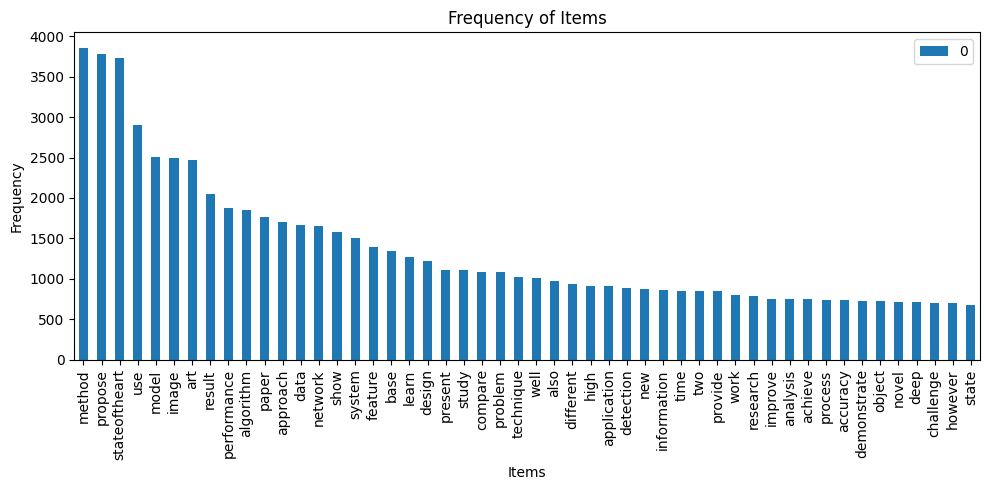

In [31]:
visualize_feat_barplot(text_tokens)

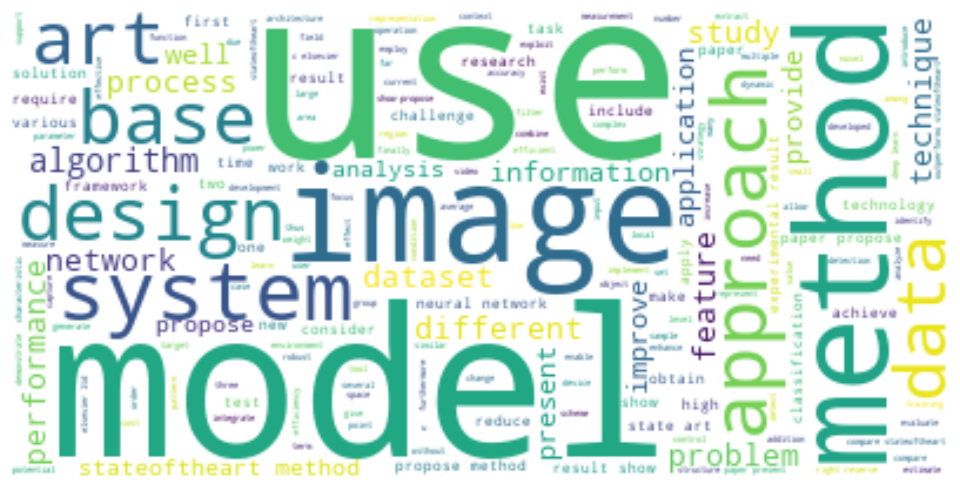

In [32]:
visualize_wordcloud(text_tokens)

#### Visualizing tokens of entire corpus (Class 1)

In [33]:
data_df_slice = data_df[data_df['label'] == 1]
text_tokens =[token for tokenized_record in data_df_slice['custom_tokenized'].tolist() for token in tokenized_record]

print(len(text_tokens))
print(text_tokens[0], text_tokens[1], text_tokens[-1])
del data_df_slice

380814
past two infection


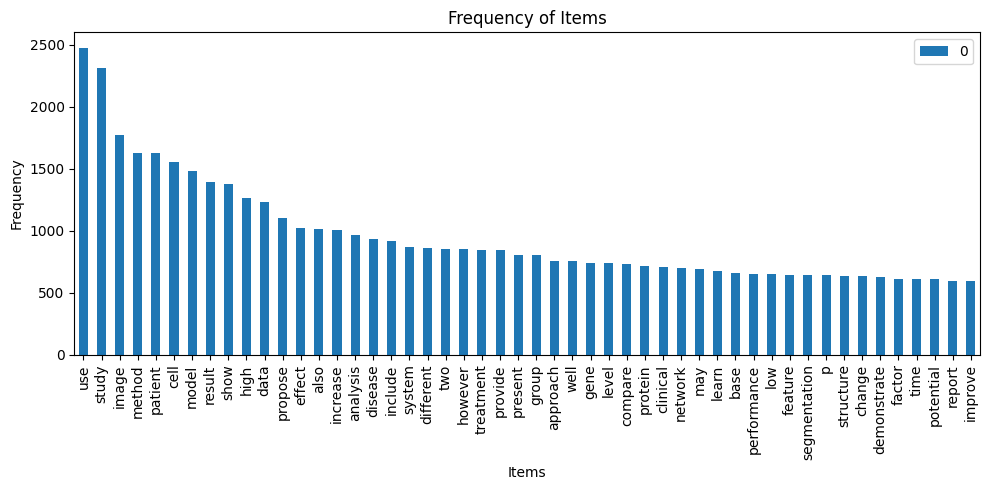

In [34]:
visualize_feat_barplot(text_tokens)

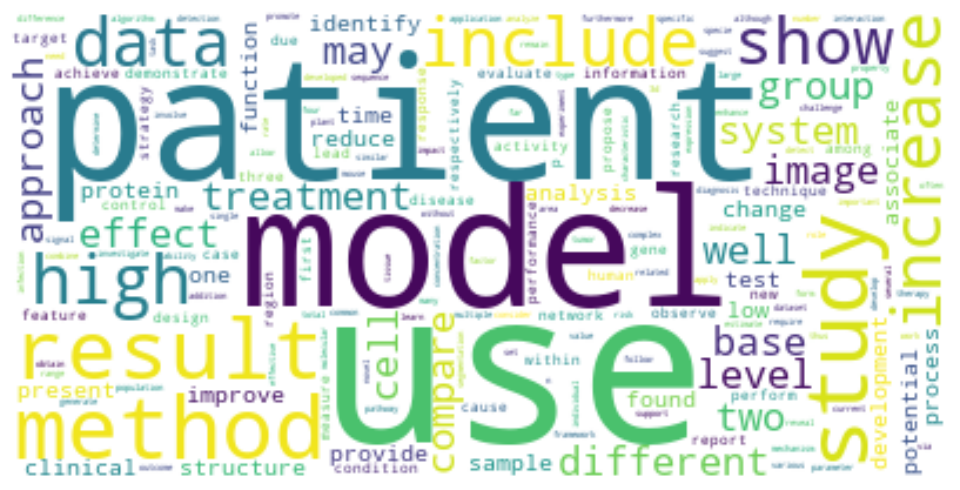

In [35]:
visualize_wordcloud(text_tokens)

### Let's check data volume for both classes

In [36]:
data_df['label'].value_counts()

label
0    3079
1    2921
Name: count, dtype: int64

## Above word clouds, we see that certain features are common in both classes
### They are mostly pertaining to research papers in common
### Let's see if we can get more refined features :)

## Can we eliminate features occurring across the entire corpus, regardless of class?
#### Because, they define overall domain, and not specific to particular class
#### Let's verify the hypothesis to certain extent

### For Class 0 & 1 both

In [37]:
data_df_slice = data_df[(data_df['label'] == 0) | (data_df['label'] == 1)]
text_tokens =[token for tokenized_record in data_df_slice['custom_tokenized'].tolist() for token in tokenized_record]

print(len(text_tokens))
print(text_tokens[0], text_tokens[1], text_tokens[-1])

717492
despite use present


In [38]:
data_df_slice.shape
del data_df_slice

In [39]:
text_tokens_counts_both = Counter(text_tokens)
print(text_tokens_counts_both['method'])
print(text_tokens_counts_both['study'])
print(text_tokens_counts_both['result'])
print(text_tokens_counts_both['approach'])
print(text_tokens_counts_both['patient'])

5487
3422
3443
2460
1728


### For Class 0

In [40]:
data_df_slice = data_df[data_df['label'] == 0]
text_tokens =[token for tokenized_record in data_df_slice['custom_tokenized'].tolist() for token in tokenized_record]

print(len(text_tokens))
print(text_tokens[0], text_tokens[1], text_tokens[-1])

336678
despite use present


In [41]:
data_df_slice.shape
del data_df_slice

In [42]:
text_tokens_counts_cls0 = Counter(text_tokens)
print(text_tokens_counts_cls0['method'])
print(text_tokens_counts_cls0['study'])
print(text_tokens_counts_cls0['result'])
print(text_tokens_counts_cls0['approach'])
print(text_tokens_counts_cls0['patient'])

3857
1111
2053
1704
98


### For Class 1

In [43]:
data_df_slice = data_df[data_df['label'] == 1]
text_tokens =[token for tokenized_record in data_df_slice['custom_tokenized'].tolist() for token in tokenized_record]

print(len(text_tokens))
print(text_tokens[0], text_tokens[1], text_tokens[-1])

380814
past two infection


In [44]:
data_df_slice.shape
del data_df_slice

In [45]:
text_tokens_counts_cls1 = Counter(text_tokens)
print(text_tokens_counts_cls1['method'])
print(text_tokens_counts_cls1['study'])
print(text_tokens_counts_cls1['result'])
print(text_tokens_counts_cls1['approach'])
print(text_tokens_counts_cls1['patient'])

1630
2311
1390
756
1630


### Visualizing the above

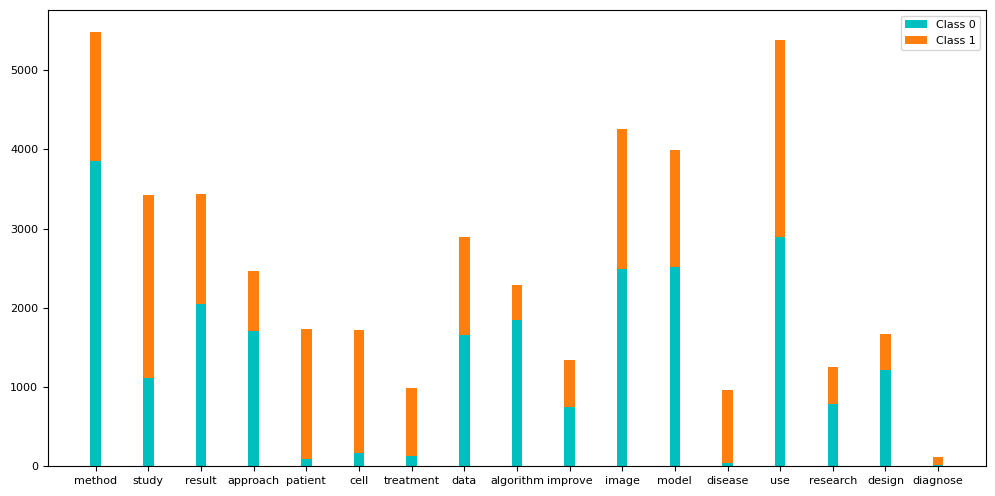

In [46]:
import numpy as np

features_list = ['method', 'study', 'result', 'approach', 'patient', 'cell', 'treatment', 'data', 'algorithm', 'improve', 'image', 'model', 'disease', 'use', 'research', 'design', 'diagnose']
X_axis = np.arange(len(features_list))

Y_cls0 = [text_tokens_counts_cls0[feature] for feature in features_list]
Y_cls1 = [text_tokens_counts_cls1[feature] for feature in features_list]

plt.rcParams.update({'font.size': 8})
bar_thickness = 0.2
plt.bar(features_list, Y_cls0, bar_thickness, color='c', label = 'Class 0')
plt.bar(features_list, Y_cls1, bar_thickness, bottom=Y_cls0, color='#FF7F0E', label = 'Class 1')
plt.legend()
plt.show()

## N-Gram Collocations

#### Bi-Grams

In [71]:
from nltk.collocations import *
from pprint import pprint

min_occurrence_bigrams = 20      # Filter out bigrams occurring less than this
top_n_bigrams = 50               # Find top these many bigrams

# Get all tokens in a single list
ngram_colloc_texts = [t for idx, row in data_df.iterrows() for t in row['custom_tokenized']]

# Instantiate bigrams collocation finder
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(ngram_colloc_texts)
finder.apply_freq_filter(min_occurrence_bigrams)

# # Comment out below 3 lines to see 'nbest' ersults
# nbest = finder.nbest(bigram_measures.pmi, top_n_bigrams)
# for i in range(len(nbest)):
#     print(i, nbest[i])

# Find scores of all bigrams
scores_ngrams = finder.score_ngrams(bigram_measures.pmi)
for i in range(top_n_bigrams):
    print(scores_ngrams[i])

(('monte', 'carlo'), 14.697715718173626)
(('spie', 'ist'), 14.452603220337094)
(('wiley', 'periodicals'), 14.408209100978642)
(('16s', 'rrna'), 14.065447502674115)
(('united', 'states'), 13.45892885858651)
(('escherichia', 'coli'), 13.353761316956264)
(('minimally', 'invasive'), 13.143354259520478)
(('gray', 'whale'), 13.106828383495362)
(('spinal', 'cord'), 13.022748181639676)
(('western', 'blot'), 12.890360796116022)
(('internet', 'things'), 12.638822029120059)
(('et', 'al'), 12.57981176335915)
(('gut', 'microbiota'), 12.515512386952878)
(('ground', 'truth'), 12.49324520483444)
(('xray', 'diffraction'), 12.118702483783657)
(('poorly', 'understood'), 12.061001597642921)
(('e', 'coli'), 11.897247181701262)
(('reactive', 'oxygen'), 11.784161392284098)
(('taken', 'together'), 11.7801778783656)
(('put', 'forward'), 11.775266571355663)
(('bone', 'marrow'), 11.742703172946937)
(('mg', 'kg1'), 11.711810548059413)
(('polymerase', 'chain'), 11.696501839228736)
(('person', 'reidentification'), 

In [72]:
len(finder.score_ngrams(bigram_measures.pmi))

1247

#### Tri-grams

In [73]:
from nltk.collocations import *
from pprint import pprint

min_occurrence_trigrams = 20      # Filter out bigrams occurring less than this
top_n_trigrams = 50               # Find top these many bigrams

# Get all tokens in a single list
ngram_colloc_texts = [t for idx, row in data_df.iterrows() for t in row['custom_tokenized']]

# Instantiate bigrams collocation finder
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(ngram_colloc_texts)
finder.apply_freq_filter(min_occurrence_trigrams)

# # Comment out below 3 lines to see 'nbest' ersults
# nbest = finder.nbest(trigram_measures.pmi, top_n_trigrams)
# for i in range(len(nbest)):
#     print(i, nbest[i])

# Find scores of all trigrams
scores_ngrams = finder.score_ngrams(trigram_measures.pmi)
for i in range(top_n_trigrams):
    print(scores_ngrams[i])

(('spinal', 'cord', 'injury'), 23.987614414119328)
(('polymerase', 'chain', 'reaction'), 23.307203804106123)
(('reactive', 'oxygen', 'specie'), 22.291320776243282)
(('elsevier', 'ltd', 'inqua'), 22.26815709415055)
(('95', 'confidence', 'interval'), 22.247495712500392)
(('confidence', 'interval', 'ci'), 22.067061240342984)
(('ltd', 'inqua', 'right'), 22.064428517079136)
(('oxygen', 'specie', 'ros'), 21.923588991742793)
(('published', 'elsevier', 'ltd'), 21.584630758945803)
(('inqua', 'right', 'reserve'), 21.562576141995784)
(('bv', 'right', 'reserve'), 21.409101661334063)
(('elsevier', 'bv', 'right'), 21.233835489052165)
(('root', 'mean', 'square'), 21.203208537156698)
(('ltd', 'right', 'reserve'), 21.19448905764351)
(('elsevier', 'ltd', 'right'), 21.090158792172552)
(('long', 'shortterm', 'memory'), 20.88093838173353)
(('2016', 'elsevier', 'ltd'), 20.60823253574817)
(('adaptive', 'resonance', 'theory'), 20.448384471418755)
(('inc', 'right', 'reserve'), 20.4137127560813)
(('elsevier', '

In [74]:
len(finder.score_ngrams(trigram_measures.pmi))

122